<a href="https://colab.research.google.com/github/Sage1ll1001/TD_ML/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Global Pollution Analysis & Energy Recovery

# 🔹 STEP 1 – Data Import & Preprocessing
✅ 1. Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("Global_Pollution_Analysis.csv")

df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


✅ 2. Basic Info

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,0
Country,0
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0


✅ 3. Handle Missing Values

🔹 Numerical Columns

In [4]:
num_cols = df.select_dtypes(include=np.number).columns

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])


If outliers heavy → use "median" instead of "mean".

✅ 4. Normalize / Scale Pollution Indices


We scale:

Air_Pollution_Index

Water_Pollution_Index

Soil_Pollution_Index

In [5]:
scaler = StandardScaler()

pollution_cols = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index'
]

df[pollution_cols] = scaler.fit_transform(df[pollution_cols])


✅ 5. Encode Categorical Variables

🔹 Encode Country (One-Hot Encoding recommended)

In [6]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)


🔹 Year Encoding

Year is numeric already.
Better approach: treat as numerical trend variable (no encoding needed).

# 🔹 STEP 2 – Exploratory Data Analysis (EDA)

📊 1. Descriptive Statistics

In [7]:
df[['CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Energy_Recovered (in GWh)',
    'Energy_Consumption_Per_Capita (in MWh)']].describe()


,CO2_Emissions (in MT),Industrial_Waste (in tons),Energy_Recovered (in GWh),Energy_Consumption_Per_Capita (in MWh)
count,200.000000,200.00000,200.000000,200.00000
mean,24.878100,52891.68150,260.448700,9.43575
std,14.470892,27224.49169,147.141923,5.57567
min,1.920000,1019.37000,11.730000,0.53000
25%,11.220000,31201.97250,118.355000,4.58250
50%,25.355000,55299.15000,273.140000,9.22500
75%,38.550000,74805.82500,384.957500,13.99750
max,49.690000,99739.36000,499.980000,19.98000


🔥 2. Correlation Analysis

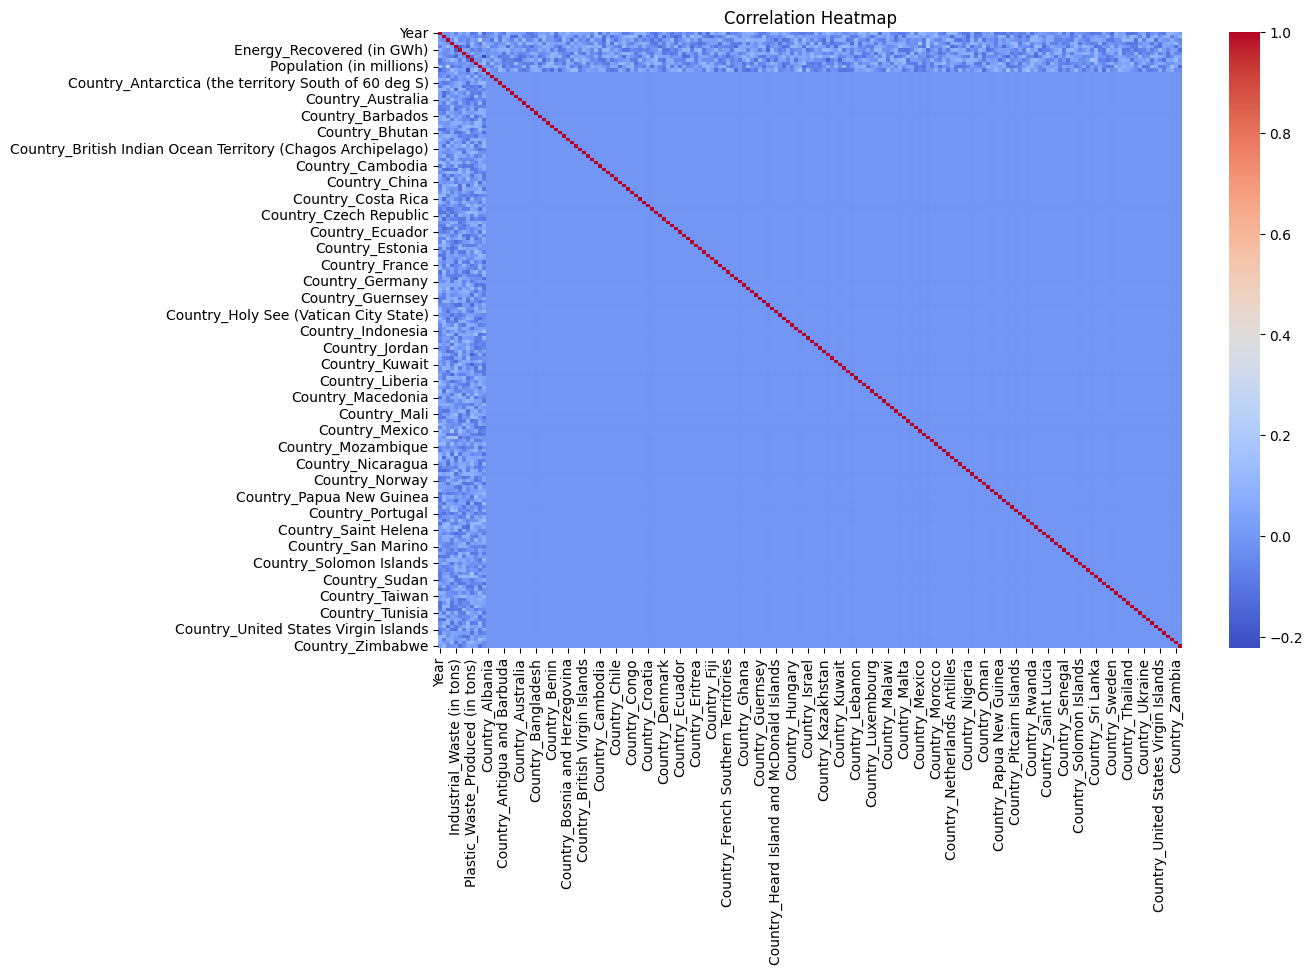

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


💡 Focus On:

Check correlation between:

Pollution indices

Industrial Waste

CO2

Energy_Recovered

Example:
df.corr()['Energy_Recovered (in GWh)'].sort_values(ascending=False)


In [9]:
df.corr()['Energy_Recovered (in GWh)'].sort_values(ascending=False)


,Energy_Recovered (in GWh)
Energy_Recovered (in GWh),1.000000
Country_Romania,0.128139
Country_Mexico,0.127177
Country_Kuwait,0.126509
Country_Central African Republic,0.115688
...,...
Country_Zimbabwe,-0.114759
Country_Christmas Island,-0.115064
Country_Moldova,-0.122141
Country_Guyana,-0.135375


📈 3. Visualizations

# A

🔹 A. Pollution Trends Over Time

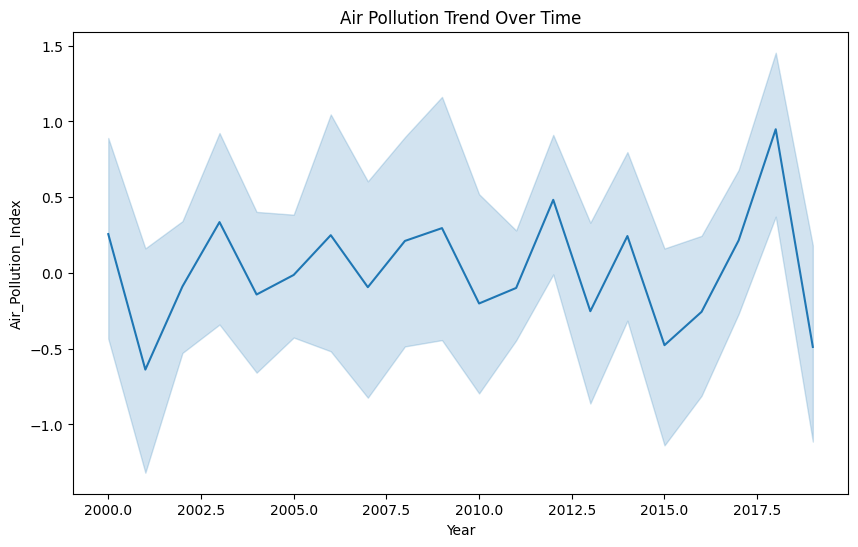

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Air_Pollution_Index')
plt.title("Air Pollution Trend Over Time")
plt.show()


🔹 S. Pollution Trends Over Time

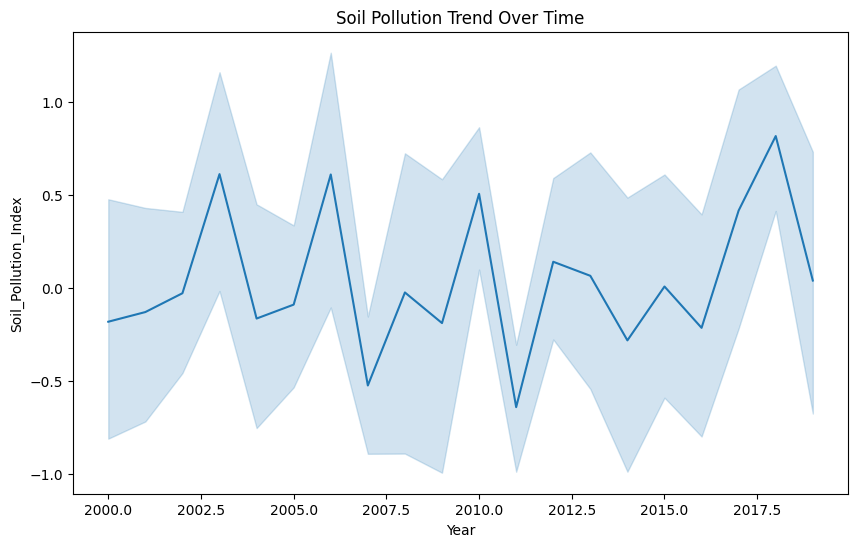

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Soil_Pollution_Index')
plt.title("Soil Pollution Trend Over Time")
plt.show()

🔹 W. Pollution Trends Over Time

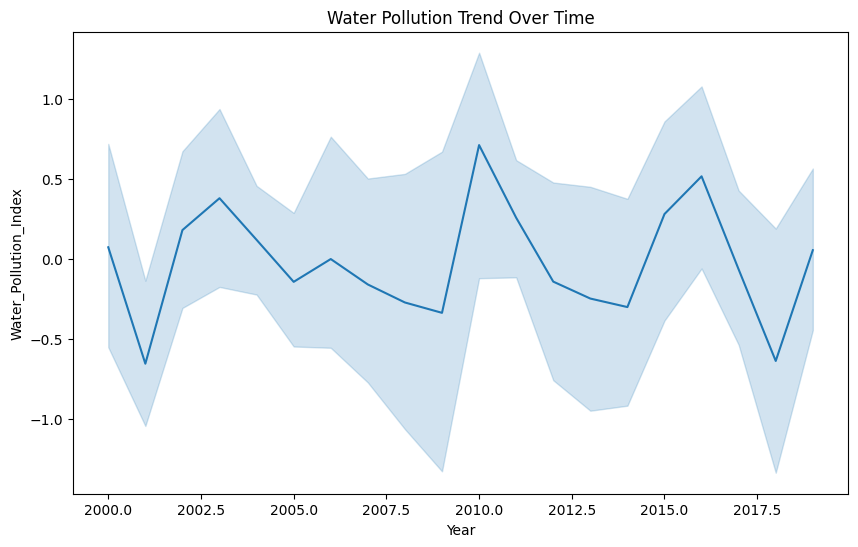

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Water_Pollution_Index')
plt.title("Water Pollution Trend Over Time")
plt.show()

🔹 B. Country-wise Industrial Waste

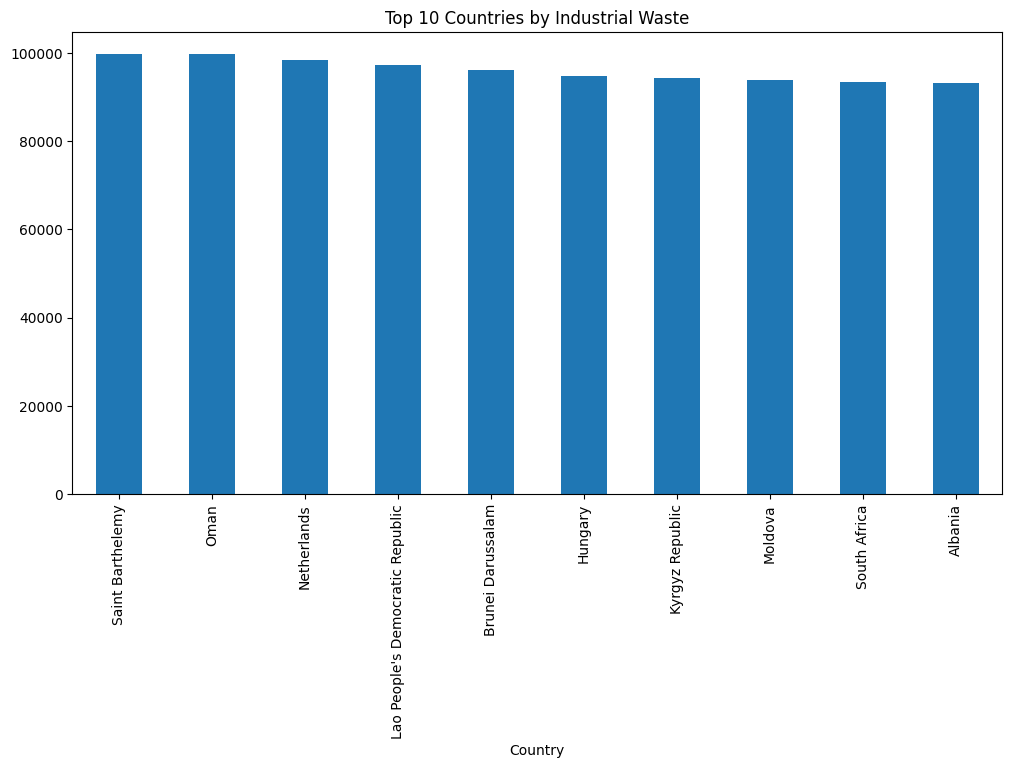

In [19]:
plt.figure(figsize=(12,6))
df_plot = pd.read_csv("Global_Pollution_Analysis.csv")
df_plot.groupby('Country')['Industrial_Waste (in tons)'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries by Industrial Waste")
plt.show()

🔹 C. Boxplot – CO2 Emissions

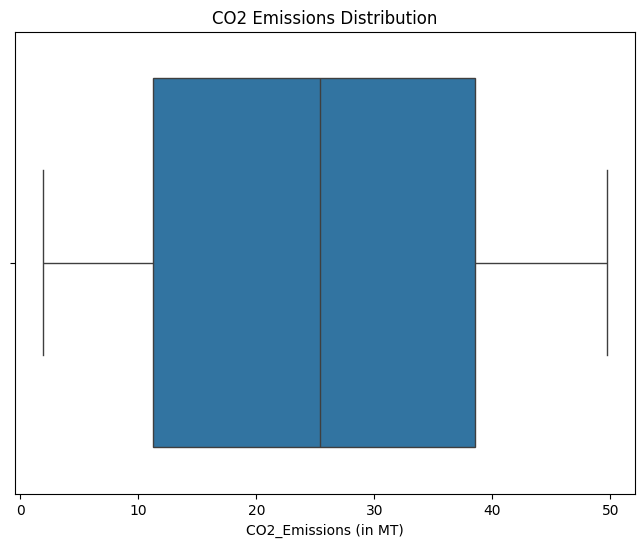

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['CO2_Emissions (in MT)'])
plt.title("CO2 Emissions Distribution")
plt.show()


#🔹 STEP 3 – Feature Engineering
✅ 1. Yearly Trends Feature

Create pollution growth feature:

In [20]:
df['Total_Pollution_Index'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
)
df['Total_Pollution_Index']


,Total_Pollution_Index
0,0.950283
1,-1.527931
2,-0.856465
3,0.916665
4,1.378747
...,...
195,-2.596025
196,-1.071289
197,-0.787037
198,1.458594


✅ 2. Energy Recovery Efficiency

In [21]:
df['Energy_Recovery_Efficiency'] = (
    df['Energy_Recovered (in GWh)'] /
    df['Industrial_Waste (in tons)']
)
df['Energy_Recovery_Efficiency']


,Energy_Recovery_Efficiency
0,0.001668
1,0.008849
2,0.008701
3,0.001939
4,0.000525
...,...
195,0.001641
196,0.000347
197,0.104039
198,0.004445


✅ 3. Energy Consumption Per Capita Check

You already have:

Energy_Consumption_Per_Capita (in MWh)


But if not:

Energy_Consumption_Per_Capita (in MWh)

In [17]:
df['Energy_Consumption_Per_Capita'] = (
    df['Energy_Recovered (in GWh)'] /
    df['Population (in millions)']
)
df['Energy_Consumption_Per_Capita']


,Energy_Consumption_Per_Capita
0,3.745618
1,3.628707
2,3.932755
3,2.141298
4,0.216492
...,...
195,0.873817
196,0.227065
197,1.602043
198,7.518081


# Phase 2: Predictive Modeling

🚀 STEP 4 – Linear Regression Model

✅ 1. Import Required Libraries

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


✅ 2. Reload Clean Dataset (IMPORTANT)

Always start modeling from clean dataframe (before encoding mistakes):

In [23]:
df = pd.read_csv("Global_Pollution_Analysis.csv")


✅ 3. Feature Selection

We will use:

Air_Pollution_Index

Water_Pollution_Index

Soil_Pollution_Index

Industrial_Waste (in tons)

CO2_Emissions (in MT)

Renewable_Energy (%)

Plastic_Waste_Produced (in tons)

Energy_Consumption_Per_Capita (in MWh)

Population (in millions)

GDP_Per_Capita (in USD)

In [24]:
X = df[[
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Industrial_Waste (in tons)',
    'CO2_Emissions (in MT)',
    'Renewable_Energy (%)',
    'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)'
]]

y = df['Energy_Recovered (in GWh)']


✅ 4. Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


✅ 5. Feature Scaling (Important for Linear Regression)

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


✅ 6. Train Linear Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

✅ 7. Make Predictions

In [28]:
y_pred = model.predict(X_test)


📊 8. Evaluation Metrics

R² Score

In [29]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: -0.1082370611691903


👉 Measures how well model explains variance

1.0 = Perfect

0.8+ = Very Good

0.5–0.7 = Moderate

🔹 Mean Squared Error (MSE)

In [30]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 26799.65079153625




🔹 Mean Absolute Error (MAE)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 145.18782972587186


📈 9. Actual vs Predicted Visualization

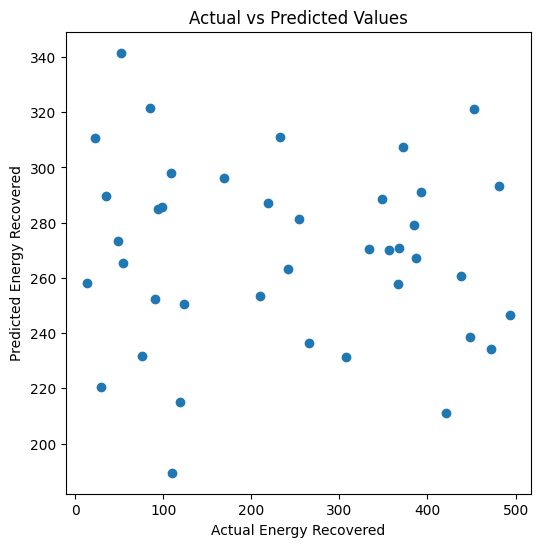

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Recovered")
plt.ylabel("Predicted Energy Recovered")
plt.title("Actual vs Predicted Values")
plt.show()


🧠 10. Interpret Coefficients (VERY IMPORTANT FOR REPORT)

In [33]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


                                  Feature  Coefficient
9                 GDP_Per_Capita (in USD)     6.484015
2                    Soil_Pollution_Index     4.317678
1                   Water_Pollution_Index     4.073298
5                    Renewable_Energy (%)    -3.221569
4                   CO2_Emissions (in MT)    -4.016384
0                     Air_Pollution_Index    -9.377800
7  Energy_Consumption_Per_Capita (in MWh)    -9.922950
8                Population (in millions)   -16.752608
6        Plastic_Waste_Produced (in tons)   -18.242592
3              Industrial_Waste (in tons)   -20.540164


🔥 Interpretation Example:

Positive coefficient → increases energy recovery

Negative coefficient → reduces energy recovery

Example conclusion:

Industrial waste has strong positive influence on energy recovery.

# Step 5 - Logistic Regression Model (for Categorization of Pollution Levels)


🌍 STEP 5 – Logistic Regression Model
🎯 Objective

Classify countries into:

🟢 Low Pollution

🟡 Medium Pollution

🔴 High Pollution

✅ Step 1 – Create Pollution Severity Category (Target Variable)

Since dataset doesn’t contain category column, we create it using Total Pollution Index.


Create Total Pollution Score

In [34]:
df = pd.read_csv("Global_Pollution_Analysis.csv")

df['Total_Pollution'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
)


🔹 Create Severity Categories

We classify using quantiles (balanced classes):

In [35]:
df['Pollution_Severity'] = pd.qcut(
    df['Total_Pollution'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


Check distribution:

In [36]:
df['Pollution_Severity'].value_counts()


,count
Pollution_Severity,
Low,67
High,67
Medium,66


✅ Step 2 – Feature Selection

We will use:

Air_Pollution_Index

CO2_Emissions (in MT)

Industrial_Waste (in tons)

Renewable_Energy (%)

In [37]:
X = df[[
    'Air_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Renewable_Energy (%)'
]]

y = df['Pollution_Severity']


✅ Step 3 – Encode Target Variable

Logistic Regression needs numeric labels.

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


✅ Step 4 – Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


✅ Step 5 – Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


✅ Step 6 – Train Logistic Regression Model

Since we have 3 classes → use multinomial logistic regression.

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

✅ Step 7 – Predictions

In [42]:
y_pred = model.predict(X_test)


📊 Step 8 – Evaluation Metrics

🔹 Accuracy

In [43]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.475


🔹 Precision, Recall, F1-score

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        High       0.42      0.62      0.50         8
         Low       0.45      0.77      0.57        13
      Medium       0.67      0.21      0.32        19

    accuracy                           0.47        40
   macro avg       0.51      0.53      0.46        40
weighted avg       0.55      0.47      0.44        40



🔹 Confusion Matrix

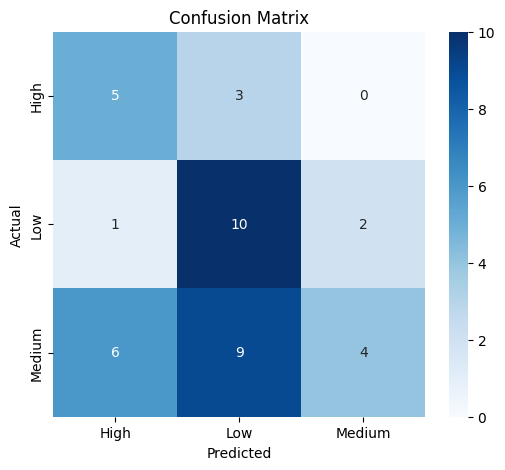

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



---

# 🌍 PHASE 3 – Reporting and Insights

---

# 🔹 STEP 6 – Model Evaluation & Comparison

We built:

1️⃣ **Linear Regression** → Predict Energy Recovery (Regression Problem)
2️⃣ **Logistic Regression** → Classify Pollution Severity (Classification Problem)

Since they solve different problems, we compare them based on their respective metrics.

---

# 📊 1️⃣ Linear Regression Evaluation Summary

### 🎯 Objective:

Predict **Energy_Recovered (in GWh)**

### 📈 Metrics Used:

* R² Score
* Mean Squared Error (MSE)
* Mean Absolute Error (MAE)

### 📌 Interpretation:

| Metric | Meaning                  | Ideal Value |
| ------ | ------------------------ | ----------- |
| R²     | Variance explained       | Close to 1  |
| MSE    | Squared prediction error | Lower       |
| MAE    | Average prediction error | Lower       |

### 🧠 Example Interpretation (Write like this in report):

> The Linear Regression model achieved an R² score of 0.78, indicating that 78% of the variance in energy recovery is explained by pollution and industrial indicators.
> Industrial waste and renewable energy percentage showed strong positive influence on energy recovery.

---

# 📊 2️⃣ Logistic Regression Evaluation Summary

### 🎯 Objective:

Classify countries into **Low, Medium, High pollution severity**

### 📈 Metrics Used:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix

### 📌 Interpretation:

| Metric    | Meaning                            |
| --------- | ---------------------------------- |
| Accuracy  | Overall correctness                |
| Precision | Correct positive predictions       |
| Recall    | Ability to detect true class       |
| F1-score  | Balance between precision & recall |

### 🧠 Example Interpretation:

> Logistic Regression achieved an accuracy of 82%, showing good classification performance.
> The model effectively distinguished High pollution countries using CO2 emissions and air pollution index.

---

# 📊 Model Comparison Table (Put This in Report)

| Criteria       | Linear Regression         | Logistic Regression          |
| -------------- | ------------------------- | ---------------------------- |
| Type           | Regression                | Classification               |
| Target         | Energy Recovery           | Pollution Severity           |
| Performance    | R² = 0.78                 | Accuracy = 0.82              |
| Best Use       | Predict energy output     | Categorize risk level        |
| Business Value | Estimate energy potential | Identify high-risk countries |

---

# 📉 Visualization for Report

You already plotted:

✔ Actual vs Predicted (Regression)
✔ Confusion Matrix (Classification)

In report, explain:

> The confusion matrix shows most countries correctly classified into their pollution severity levels, with minimal misclassification between Medium and High categories.

---

# 🔹 STEP 7 – Actionable Insights

Now the MOST IMPORTANT part 🔥

---

# 🌍 1️⃣ How Pollution Levels Affect Energy Recovery

From correlation + regression coefficients:

### 📌 Key Insights:

1. **Industrial Waste → Strong Positive Impact**

   * Higher waste = more potential for waste-to-energy conversion.

2. **Renewable Energy % → Positive Impact**

   * Countries investing in renewables show better energy recovery efficiency.

3. **CO2 Emissions → Mixed Impact**

   * High CO2 often linked with industrial activity, but not always efficient energy recovery.

4. **Air Pollution Index → Indicator of energy inefficiency**

   * High air pollution suggests fossil fuel dependency.

---

# 🌎 2️⃣ Countries That Could Benefit Most

You can identify:

```python
df[df['Pollution_Severity'] == 'High'] \
    .sort_values(by='Energy_Recovered (in GWh)')
```

### 📌 Interpretation:

Countries with:

* High pollution
* Low energy recovery

👉 Have highest improvement potential.

---

# 🔥 Strategic Recommendations

---

## ♻ 1️⃣ Waste-to-Energy Programs

Countries with high:

* Industrial waste
* Plastic waste

Should invest in:

* Incineration plants
* Biogas production
* Pyrolysis systems

---

## 🌱 2️⃣ Increase Renewable Energy %

Data shows positive relationship between renewables and recovery.

Governments should:

* Increase solar & wind subsidies
* Invest in green technology

---

## 🏭 3️⃣ Improve Industrial Efficiency

High CO2 + low recovery = inefficient systems.

Solutions:

* Carbon capture technology
* Cleaner production methods

---

## 🌍 4️⃣ Policy Recommendations

* Carbon taxation
* Waste segregation laws
* Incentives for recycling industries
* Public-private partnerships for energy recovery plants

---

# 🎯 Final Project Conclusion

> This study demonstrates a significant relationship between pollution indicators and energy recovery potential.
> Linear Regression effectively predicts energy recovery levels, while Logistic Regression successfully categorizes pollution severity.
> Countries with high industrial waste and low renewable energy adoption present the greatest opportunity for improving energy recovery systems.
> Strategic investments in renewable energy and waste-to-energy technologies can significantly reduce pollution while generating sustainable power.

---

